In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
X=df.drop(['instant','dteday','casual','registered','cnt'],axis=1)

In [5]:
y=df['cnt']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly_converter=PolynomialFeatures(degree=2,include_bias=False)

In [10]:
poly_features=poly_converter.fit_transform(X)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler= StandardScaler()

In [13]:
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train=scaler.transform(X_train)

In [15]:
X_test=scaler.transform(X_test)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [18]:
scaler.fit(X_train)

StandardScaler()

In [19]:
X_train=scaler.transform(X_train)

In [20]:
X_test =scaler.transform(X_test)

### Ridge Regression

In [21]:
from sklearn.linear_model import RidgeCV

In [22]:
from sklearn.metrics import SCORERS

In [23]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [24]:
ridge_cv_model=RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_root_mean_squared_error')

In [25]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_root_mean_squared_error')

In [26]:
predicted_y=ridge_cv_model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
MAE=mean_absolute_error(y_test,predicted_y)
MAE

620.2327632885679

In [29]:
RMSE=np.sqrt(mean_squared_error(y_test,predicted_y))
RMSE

824.0475628531165

### Lasso Regression

In [30]:
df=pd.read_csv('day.csv')

In [31]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [32]:
X=df.drop(['instant','dteday','casual','registered','cnt'],axis=1)

In [33]:
y=df['cnt']

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
poly_converter=PolynomialFeatures(degree=2, include_bias=False)

In [36]:
poly_features=poly_converter.fit_transform(X)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler= StandardScaler()

In [41]:
scaler.fit(X_train)

StandardScaler()

In [42]:
X_train=scaler.transform(X_train)

In [43]:
X_test=scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LassoCV

In [45]:
lasso_cv_model=LassoCV(eps=0.001,n_alphas=100,max_iter=1000000,cv=10)

In [46]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=1000000)

In [47]:
predicted_y=lasso_cv_model.predict(X_test)

In [48]:
residual=y_test-predicted_y

<AxesSubplot:xlabel='cnt', ylabel='cnt'>

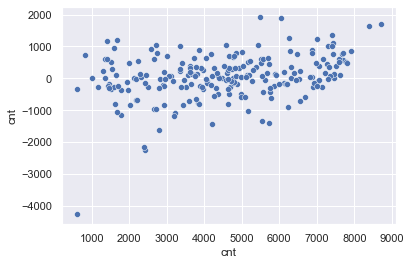

In [49]:
sns.scatterplot(x=y_test,y=residual)

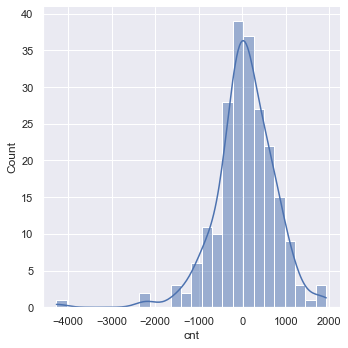

In [50]:
sns.displot(residual,kde=True)

In [51]:
MAE=mean_absolute_error(y_test,predicted_y)
MAE

495.96417494134573

In [52]:
RMSE=np.sqrt(mean_squared_error(y_test,predicted_y))
RMSE

704.7568821922841

In [53]:
lasso_cv_model.coef_

array([ 5.80462505e+02,  4.84757968e+02,  1.75340817e+02, -0.00000000e+00,
       -2.52590905e+02, -2.52917550e+01,  5.48951685e+02,  3.05528666e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.29635128e+02,  0.00000000e+00, -7.39347440e+01, -1.43855074e+02,
       -0.00000000e+00, -0.00000000e+00, -1.31244160e+02, -5.44985002e+01,
       -0.00000000e+00, -0.00000000e+00,  1.25504536e+01,  1.96642801e+01,
       -5.79908793e+01,  1.18100463e+02, -1.35454462e+01, -9.33982865e+01,
        0.00000000e+00,  4.07129154e+02, -0.00000000e+00, -0.00000000e+00,
       -4.85725624e+02, -8.75661023e+01,  2.02835705e+02,  0.00000000e+00,
       -1.74321047e+02,  1.90038547e+02,  2.23560444e+02, -5.50482690e+01,
       -0.00000000e+00, -0.00000000e+00, -1.08634452e+02,  0.00000000e+00,
        0.00000000e+00,  1.18568094e+02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.28048114e+02,  2.88194085e+00,
       -0.00000000e+00, -

In [54]:
lasso_cv_model.alpha_

4.789334323925163

### Elastic Net

In [55]:
df=pd.read_csv("day.csv")

In [56]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [57]:
X=df.drop(['instant','dteday','casual','registered','cnt'],axis=1)

In [58]:
y=df['cnt']

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
poly_converter=PolynomialFeatures(degree=2,include_bias=False)

In [61]:
poly_features=poly_converter.fit_transform(X)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()

In [66]:
scaler.fit(X_train)

StandardScaler()

In [67]:
X_train=scaler.transform(X_train)

In [68]:
X_test=scaler.transform(X_test)

In [69]:
from sklearn.linear_model import ElasticNetCV

In [70]:
elastic_net_cv_model= ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=1000000)

In [71]:
elastic_net_cv_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [72]:
predicted_y=elastic_net_cv_model.predict(X_test)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [74]:
MAE=mean_absolute_error(y_test,predicted_y)
MAE

497.6008621277772

In [75]:
RMSE=np.sqrt(mean_squared_error(y_test,predicted_y))
RMSE

698.5382278593087

In [76]:
residual=y_test-predicted_y

<AxesSubplot:xlabel='cnt', ylabel='cnt'>

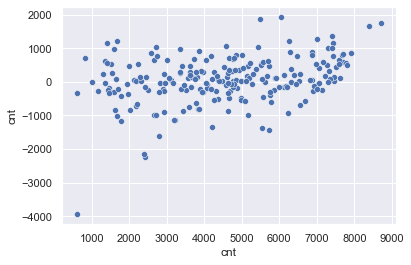

In [77]:
sns.scatterplot(x=y_test, y=residual)

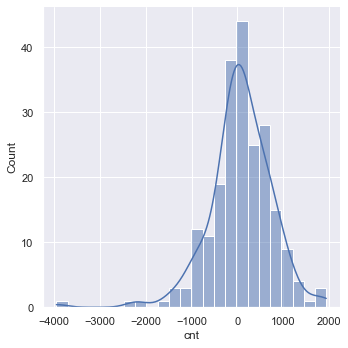

In [78]:
sns.displot(residual,kde=True)

In [79]:
error= RMSE/ (np.max(y) - np.min(y)) *100

In [80]:
error

8.036564977672672

In [81]:
to_pred=[[1,0,1,0,1,1,2,14.11,18.18,80.58,10.75]]

In [82]:
poly_pred=poly_converter.fit_transform(to_pred)

In [83]:
scaled_pred=scaler.transform(poly_pred)

In [84]:
elastic_net_cv_model.predict(scaled_pred)

array([1979.42521645])

In [85]:
elastic_net_cv_model.l1_ratio_

1.0